<a href="https://colab.research.google.com/github/gravity102424/ESAA/blob/main/ESAA_YB_0919(1)_exercises_chipotle_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [ ]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep="\t")

### Step 4. See the first 10 entries

In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

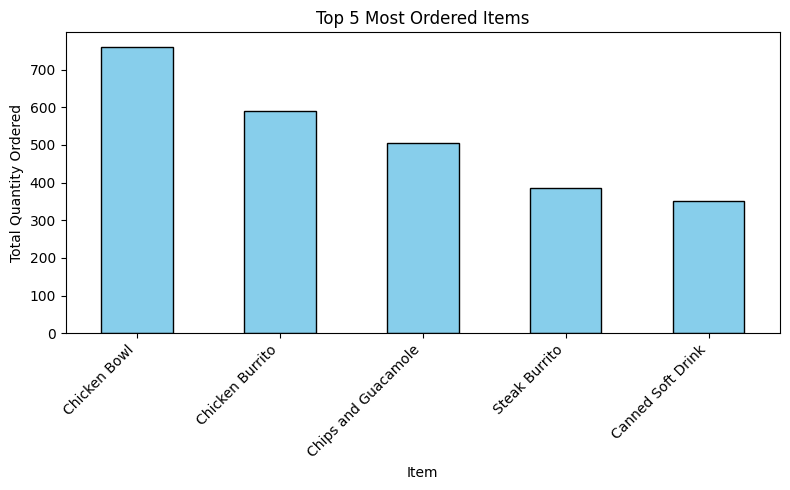

In [ ]:
item_counts = chipo.groupby("item_name")["quantity"].sum().sort_values(ascending=False)
top5_items = item_counts.head(5)
plt.figure(figsize=(8,5))
top5_items.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 5 Most Ordered Items")
plt.xlabel("Item")
plt.ylabel("Total Quantity Ordered")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

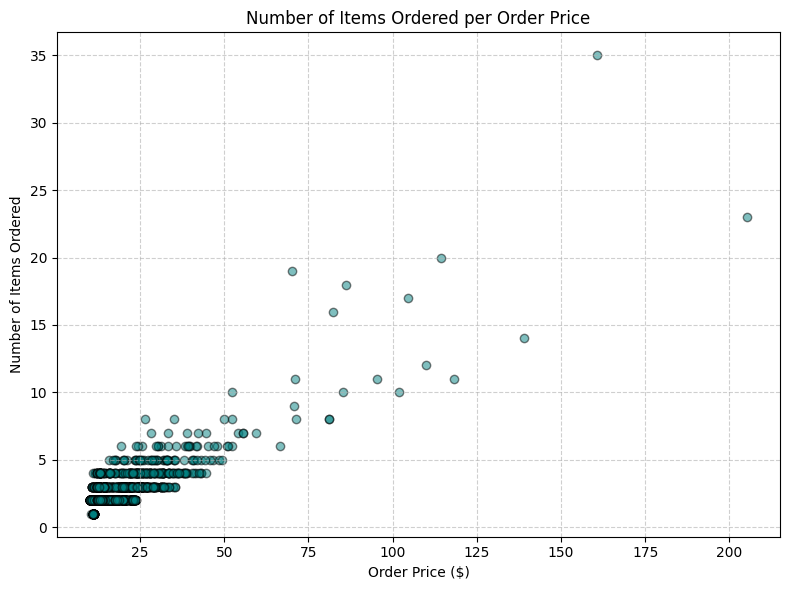

In [ ]:
# item_price를 숫자(float)로 변환 (달러 기호 제거)
chipo["item_price"] = chipo["item_price"].str.replace("$", "").astype(float)
# 주문별 총 금액
order_price = chipo.groupby("order_id")["item_price"].sum()
# 주문별 총 아이템 개수
order_items = chipo.groupby("order_id")["quantity"].sum()
# 산점도 시각화
plt.figure(figsize=(8,6))
plt.scatter(order_price, order_items, alpha=0.5, color="teal", edgecolors="k")

plt.title("Number of Items Ordered per Order Price")
plt.xlabel("Order Price ($)")
plt.ylabel("Number of Items Ordered")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### Step 7. BONUS: Create a question and a graph to answer your own question.

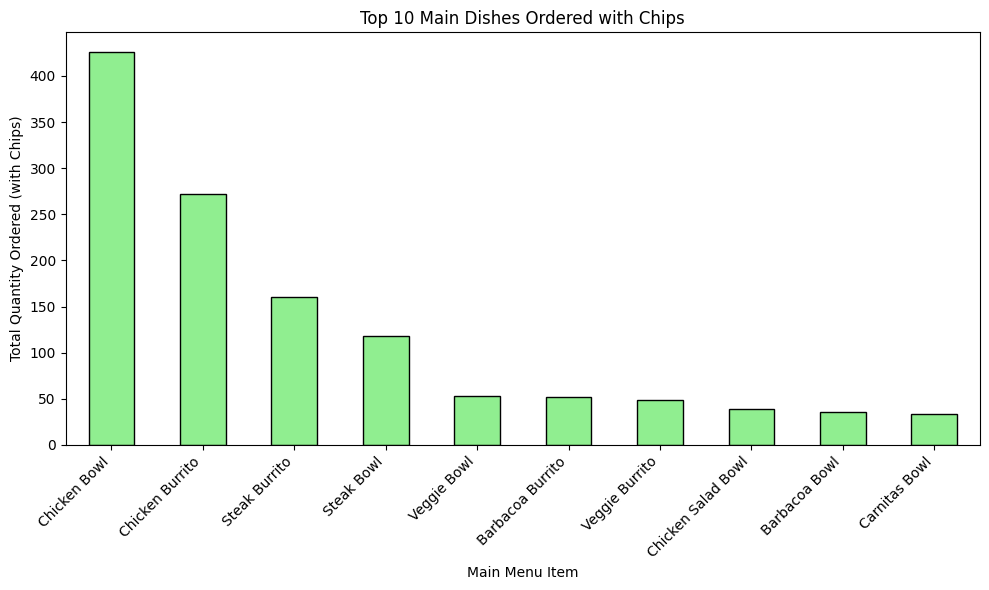

In [ ]:
# Chips이 포함된 주문 찾기
chips_orders = chipo[chipo["item_name"].str.contains("Chips", case=False)]["order_id"].unique()

# Chips 주문에 포함된 다른 아이템들
chips_with_main = chipo[
    (chipo["order_id"].isin(chips_orders)) &
    (chipo["item_name"].str.contains("Bowl|Burrito", case=False))
]

# 메인 메뉴별 주문 개수 집계
main_menu_counts = chips_with_main.groupby("item_name")["quantity"].sum().sort_values(ascending=False)

# 상위 10개만 표시
top10_main_with_chips = main_menu_counts.head(10)

# 시각화
plt.figure(figsize=(10,6))
top10_main_with_chips.plot(kind="bar", color="lightgreen", edgecolor="black")

plt.title("Top 10 Main Dishes Ordered with Chips")
plt.xlabel("Main Menu Item")
plt.ylabel("Total Quantity Ordered (with Chips)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


**“Chips을 주문한 사람들은 어떤 메인 메뉴(Bowl, Burrito)를 더 많이 같이 주문했을까?”**

이 그래프를 보면, Chips와 가장 자주 함께 주문된 메인 메뉴가 무엇인지 알 수 있다.

예상컨대 Chicken Bowl이나 Chicken Burrito가 상위권에 올 것이다.